#Multiple Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> # Importing the required Librariers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
%matplotlib inline

 > # Reading the Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FML/Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

> # Separating Dependent and Independent Variables

In [ ]:
X = data.drop('Sales',axis=1)
y = data['Sales']

> # Splitting data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred[:5]

array([15.82287053, 18.38101053,  9.78264322, 12.46087358, 11.58422768])

In [ ]:
y_test[:5]

112    17.1
165    16.9
12      9.2
73     11.0
144    12.3
Name: Sales, dtype: float64

> # Model Accuracy

In [ ]:
r2_scr=r2_score(y_test,y_pred)
print(r2_scr)
print('Accuracy :',round(r2_scr*100,2))

0.9052057285496888
Accuracy : 90.52


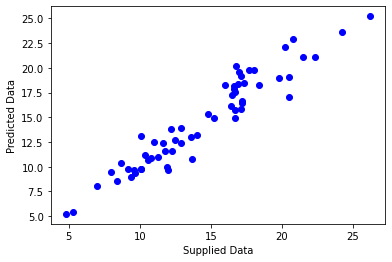

In [ ]:
plt.scatter(y_test,y_pred,color='blue',label='Scatter plot')
plt.xlabel('Supplied Data')
plt.ylabel('Predicted Data')
plt.show()

> # Difference between Actual and Predicted Data

In [ ]:
pred_df = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_pred,
    'Difference' : y_test-y_pred
})
pred_df.head()

,Actual,Predicted,Difference
112,17.1,15.822871,1.277129
165,16.9,18.381011,-1.481011
12,9.2,9.782643,-0.582643
73,11.0,12.460874,-1.460874
144,12.3,11.584228,0.715772
